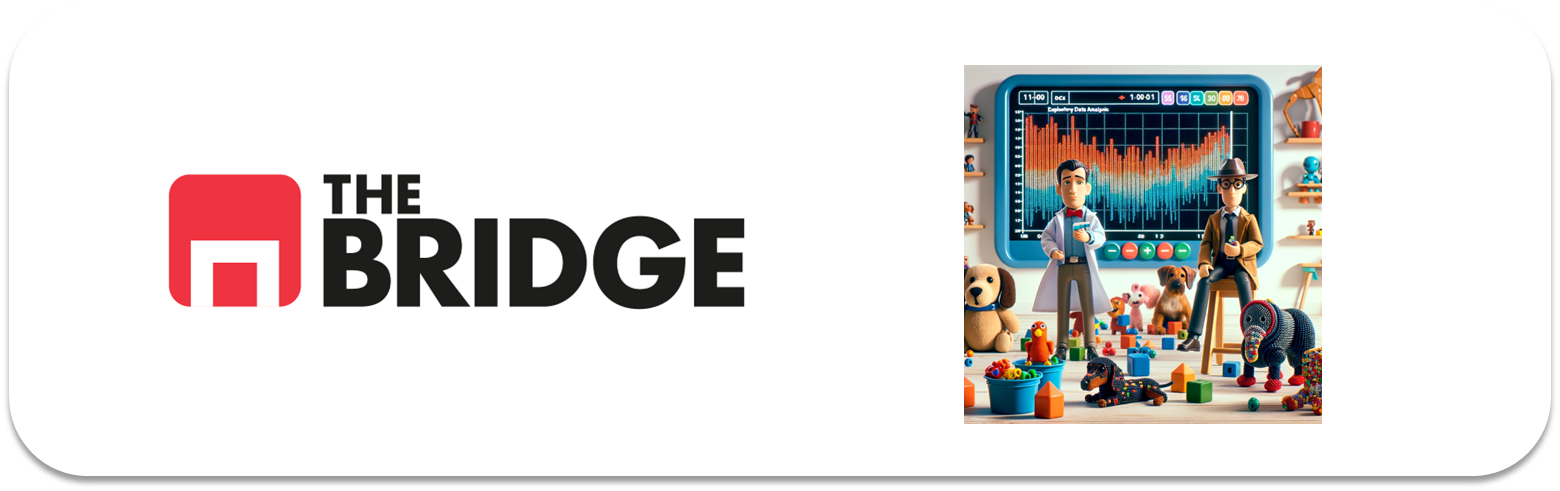

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

def plot_grouped_boxplots(df, cat_col, num_col):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    group_size = 5

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=subset_df)
        plt.title(f'Boxplots of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xticks(rotation=45)
        plt.show()

def plot_grouped_histograms(df, cat_col, num_col, group_size):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat))
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):

    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.grid(True)
    plt.show()
    
def bubble_plot(df, col_x, col_y, col_size, scale = 1000):
    """
    Crea un scatter plot usando dos columnas para los ejes X e Y,
    y una tercera columna para determinar el tamaño de los puntos.

    Args:
    df (pd.DataFrame): DataFrame de pandas.
    col_x (str): Nombre de la columna para el eje X.
    col_y (str): Nombre de la columna para el eje Y.
    col_size (str): Nombre de la columna para determinar el tamaño de los puntos.
    """

    # Asegúrate de que los valores de tamaño sean positivos
    sizes = (df[col_size] - df[col_size].min() + 1)/scale

    plt.scatter(df[col_x], df[col_y], s=sizes)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Burbujas de {col_x} vs {col_y} con Tamaño basado en {col_size}')
    plt.show()



## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv('./data/titanic.csv')

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(['deck', 'survived', 'pclass', 'embarked'], axis=1, inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
#creamos una nueva columna llamada family numbers que es el resultado de la suma de las columnas parch y sibsp
df_titanic = df_titanic.assign(family_members=df_titanic['parch'] + df_titanic['sibsp'])
#eliminamos las columnas pacrh y sibsp
df_titanic.drop(['parch', 'sibsp'], axis=1, inplace=True)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
#reemplazamos los valores nulos de la columna embark_town por la moda
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace=True)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
#reemplazamos los valores nulos de las columnas age y who por la media
df_titanic['age'].fillna(df_titanic.groupby('who')['age'].transform('mean'), inplace=True)

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

***1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?***

alive
no     549
yes    342
Name: count, dtype: int64
sex     alive
female  yes      0.742038
        no       0.257962
male    no       0.811092
        yes      0.188908
Name: proportion, dtype: float64
Chi-squared statistic: 260.71702016732104
P-value: 1.1973570627755645e-58
Valor chi_cuadrado: 9.396300833669894
P-value: 0.0021742368105679586


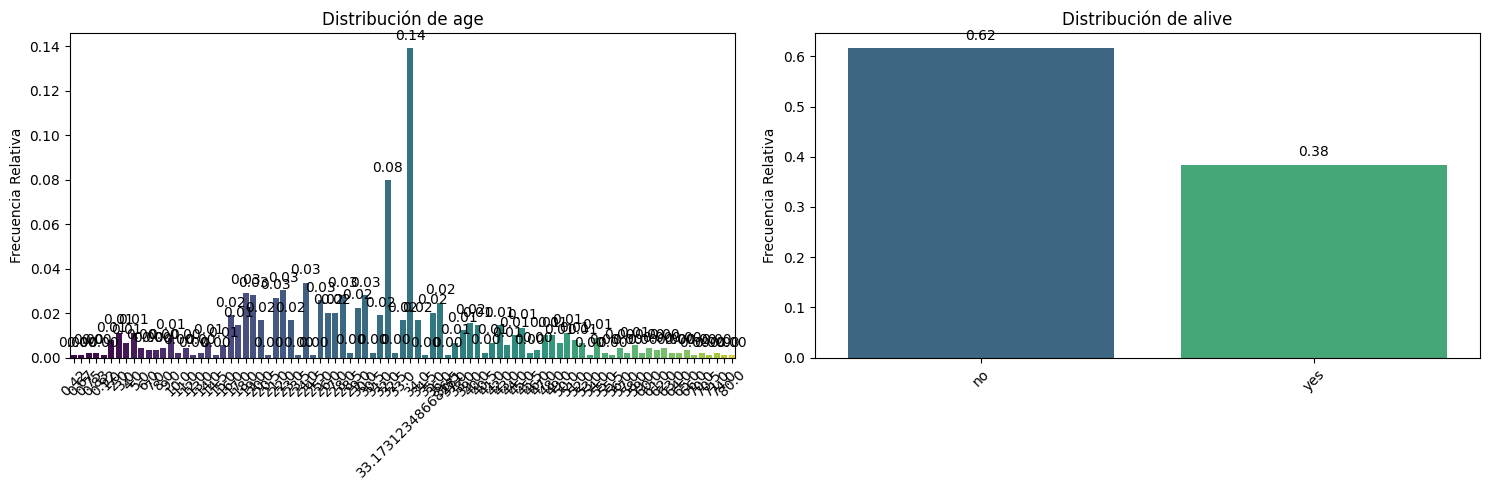

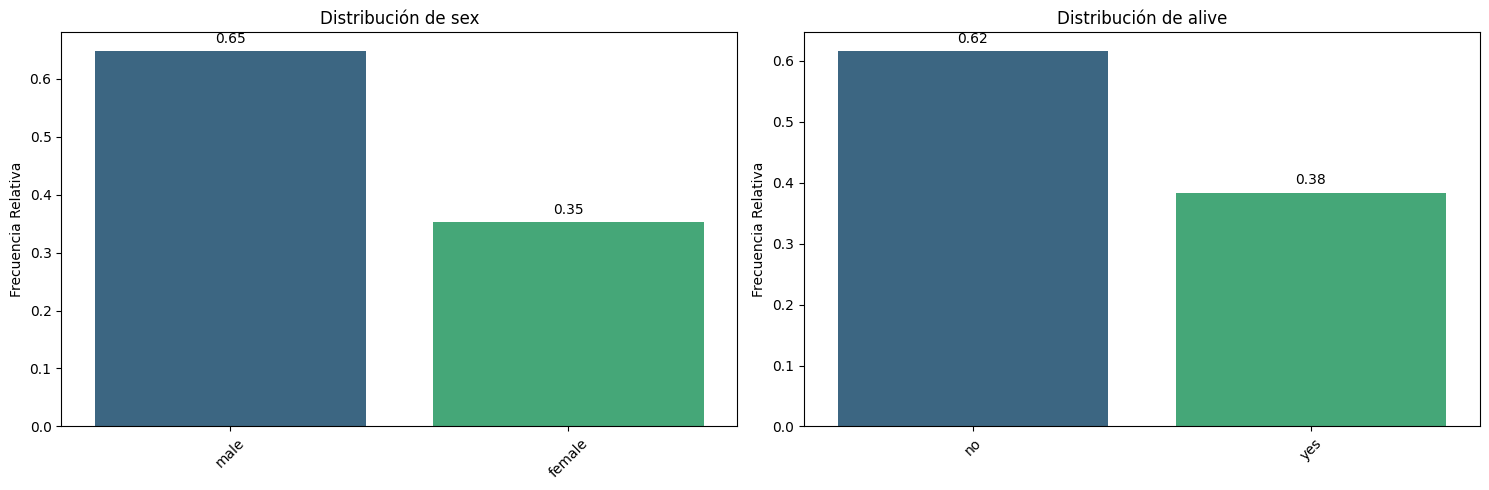

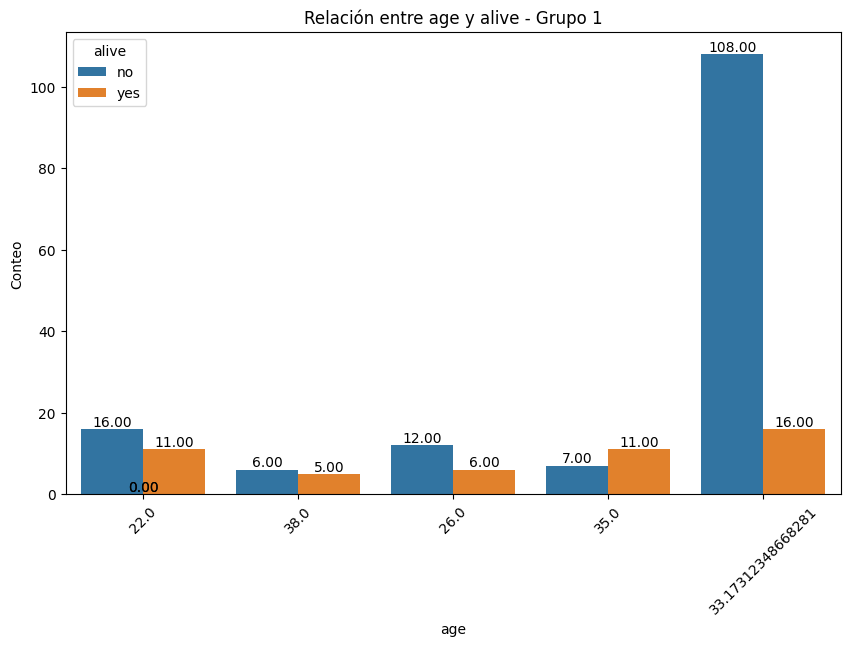

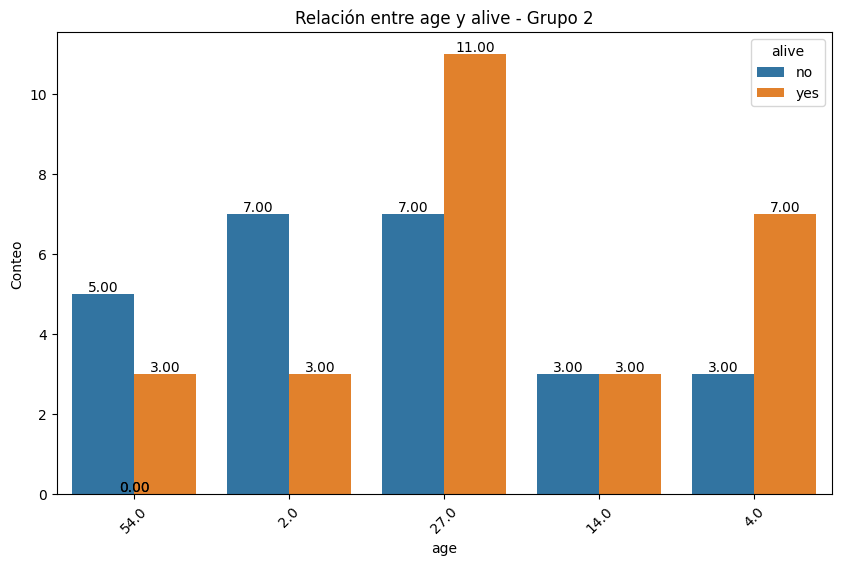

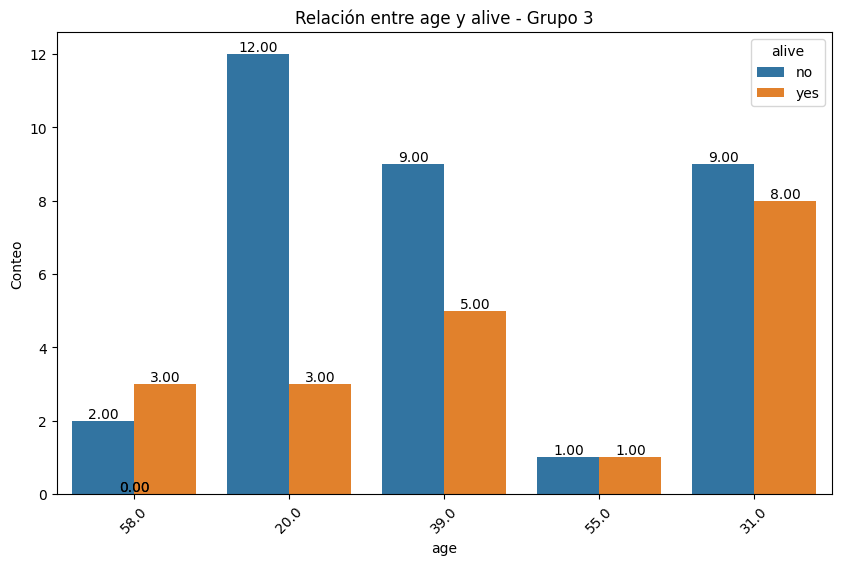

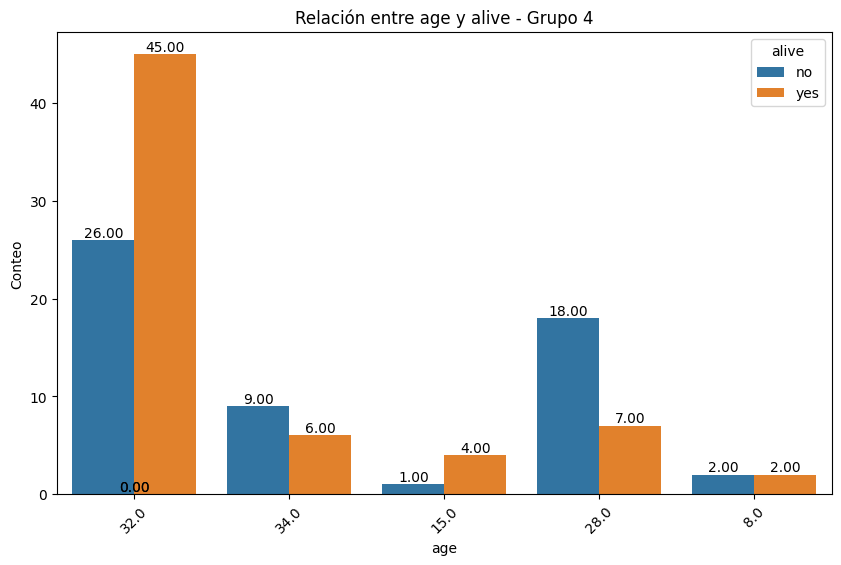

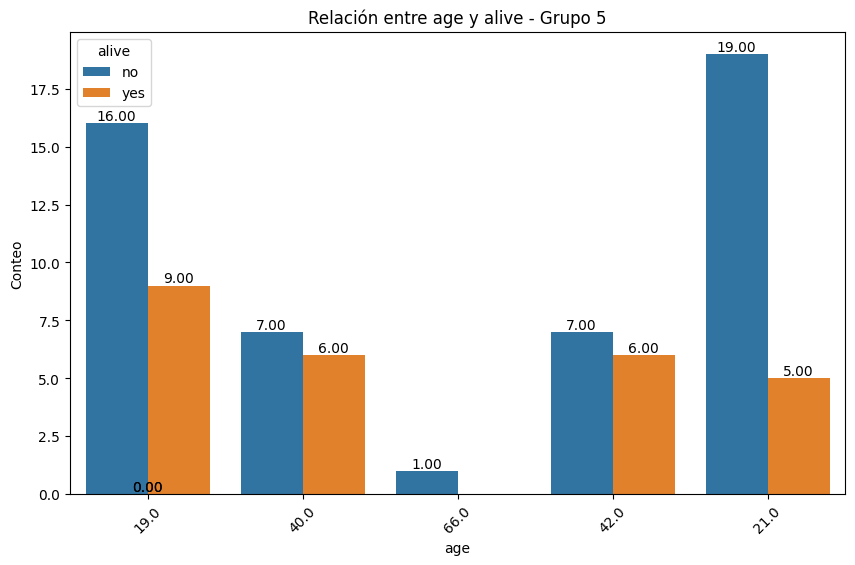

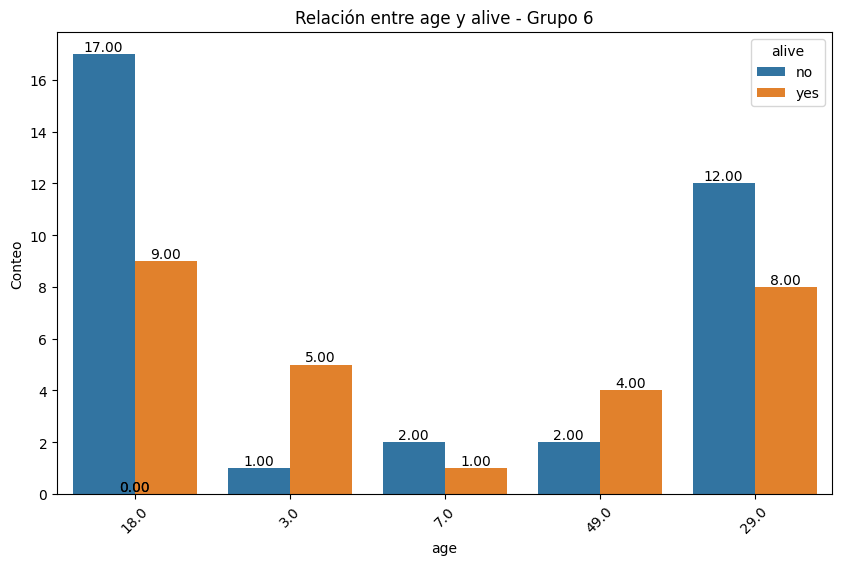

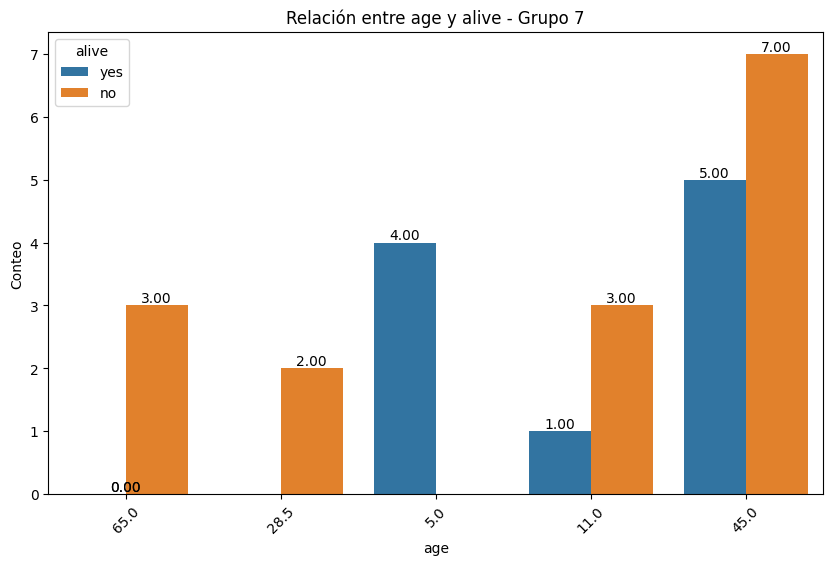

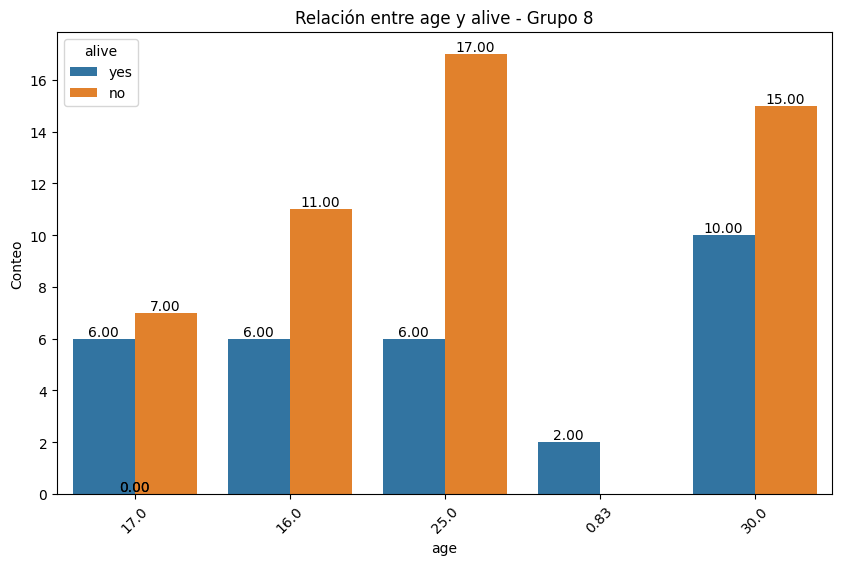

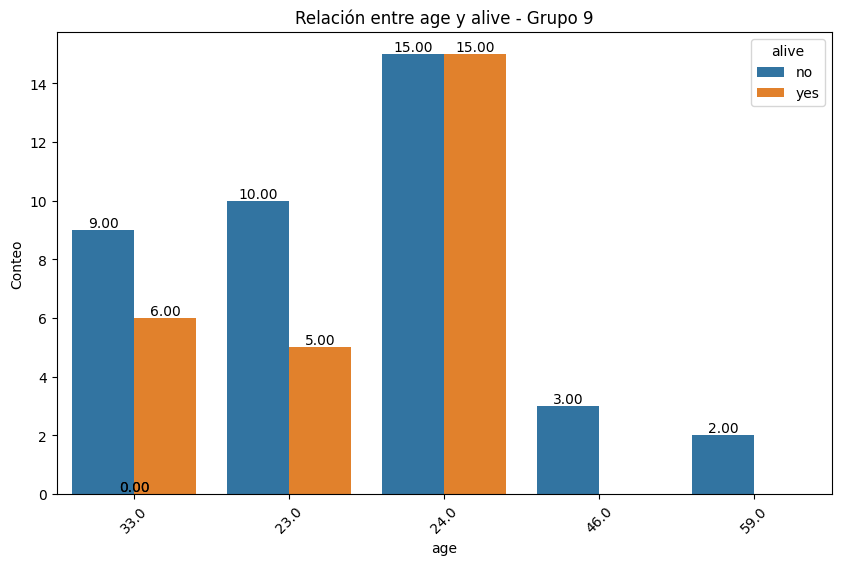

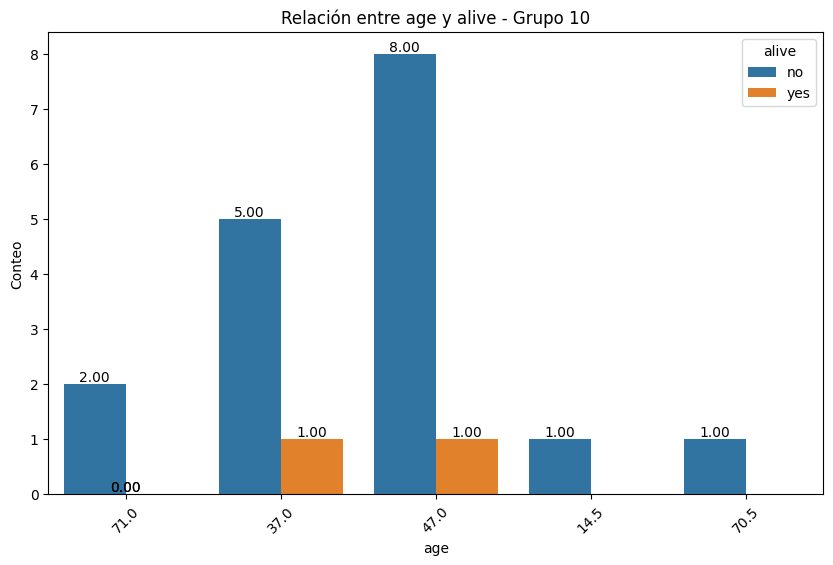

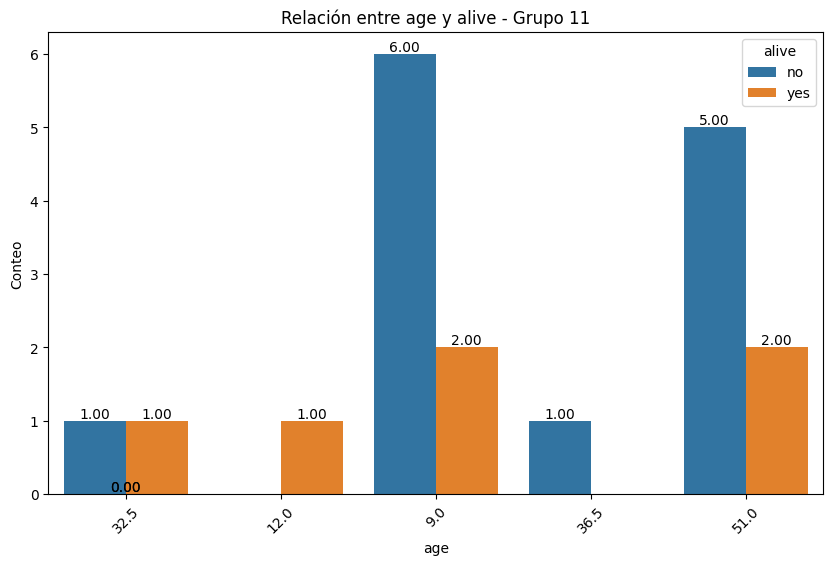

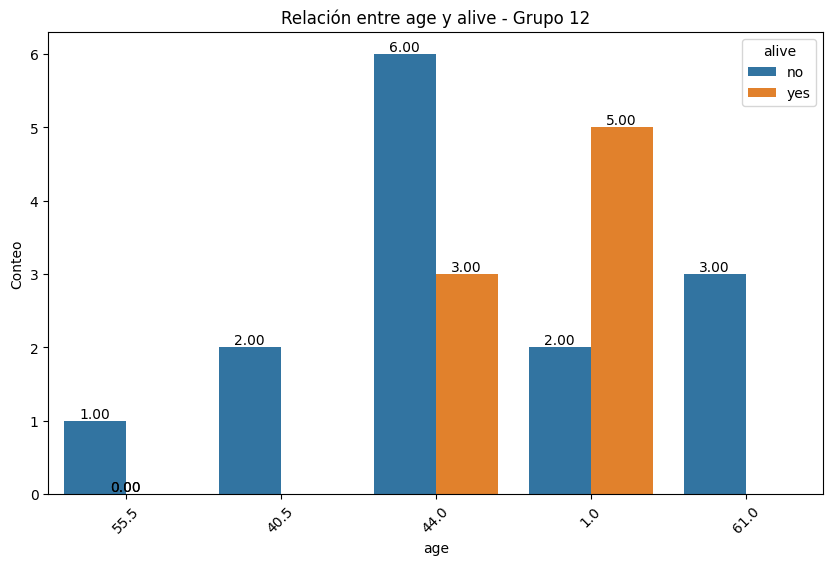

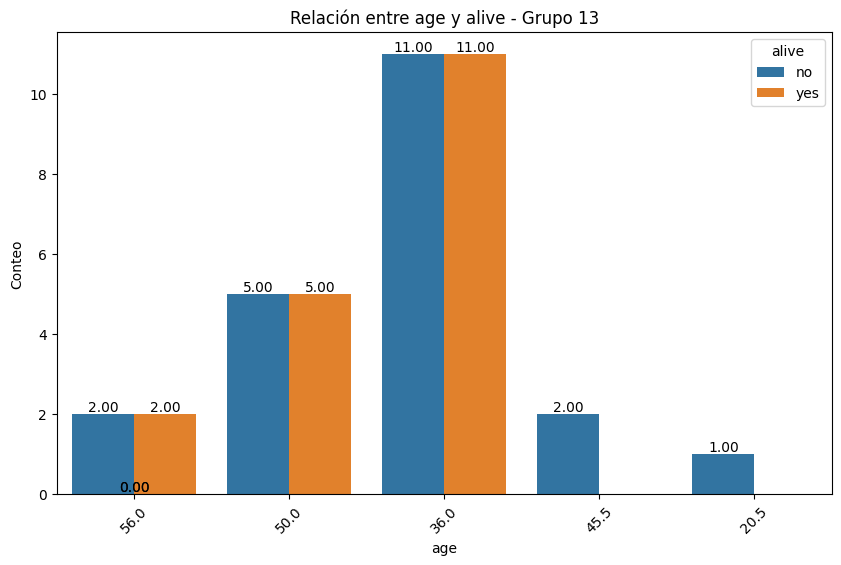

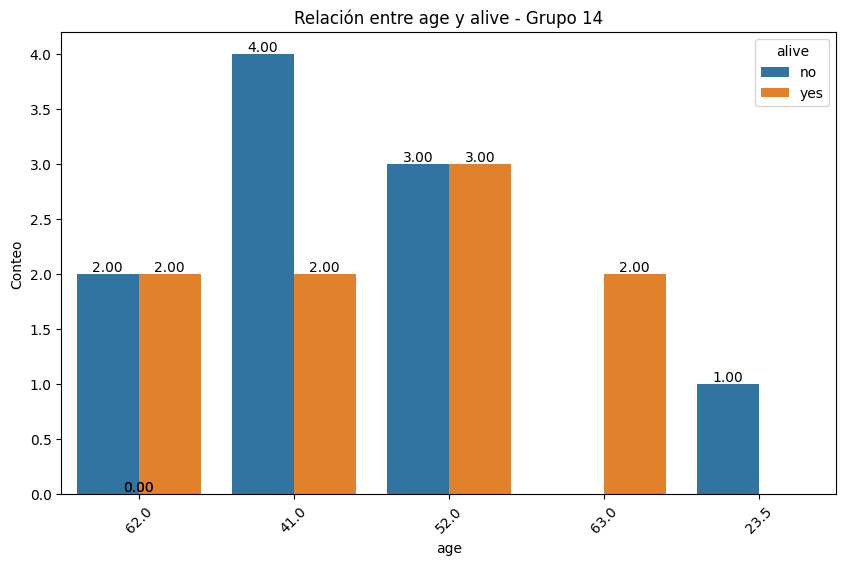

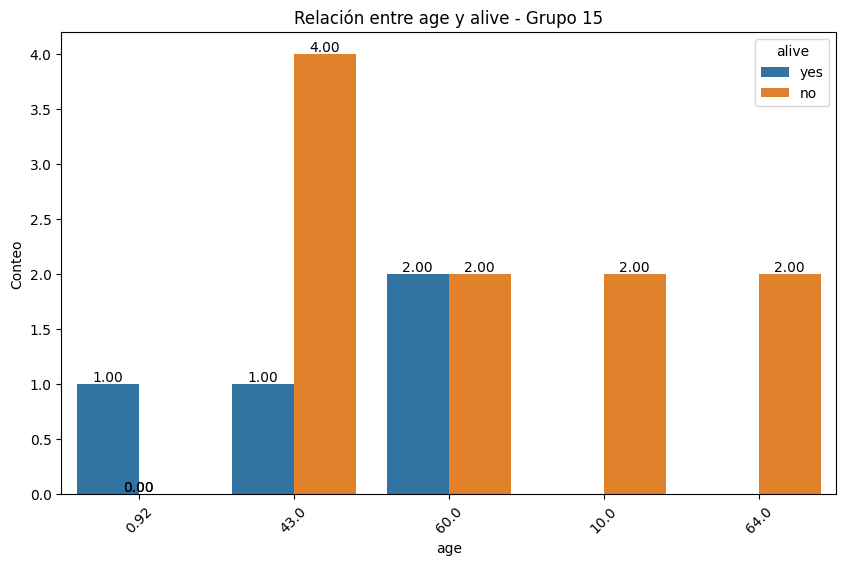

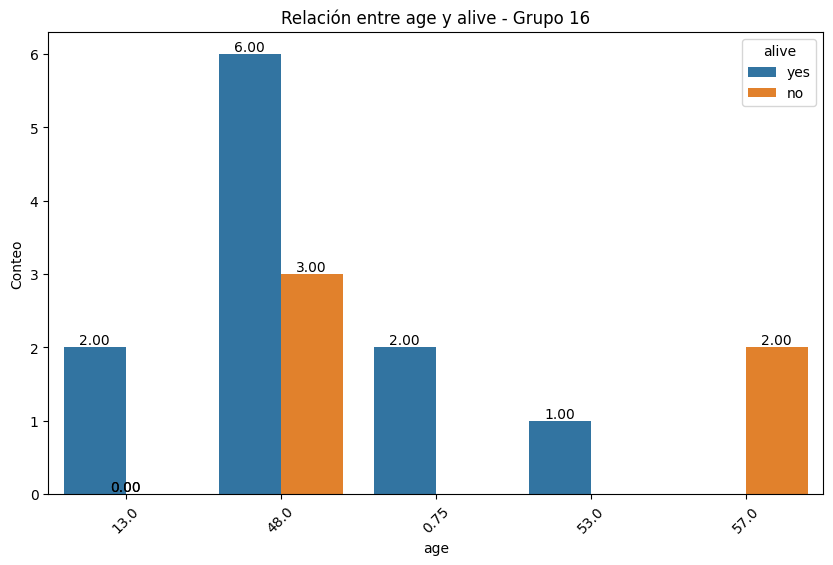

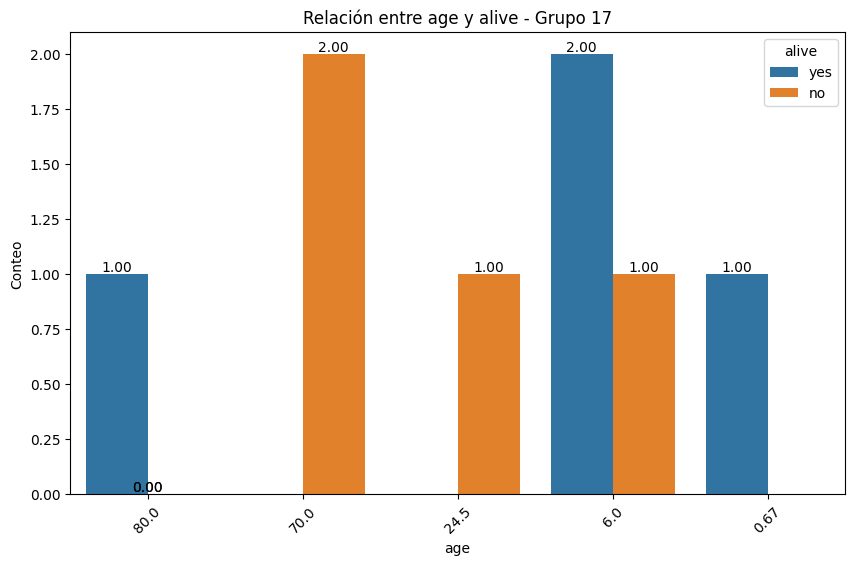

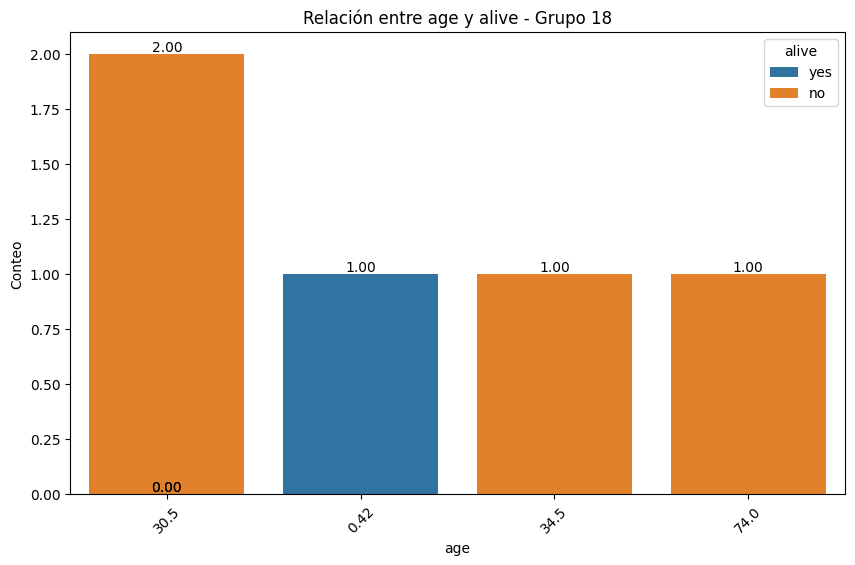

(2,)


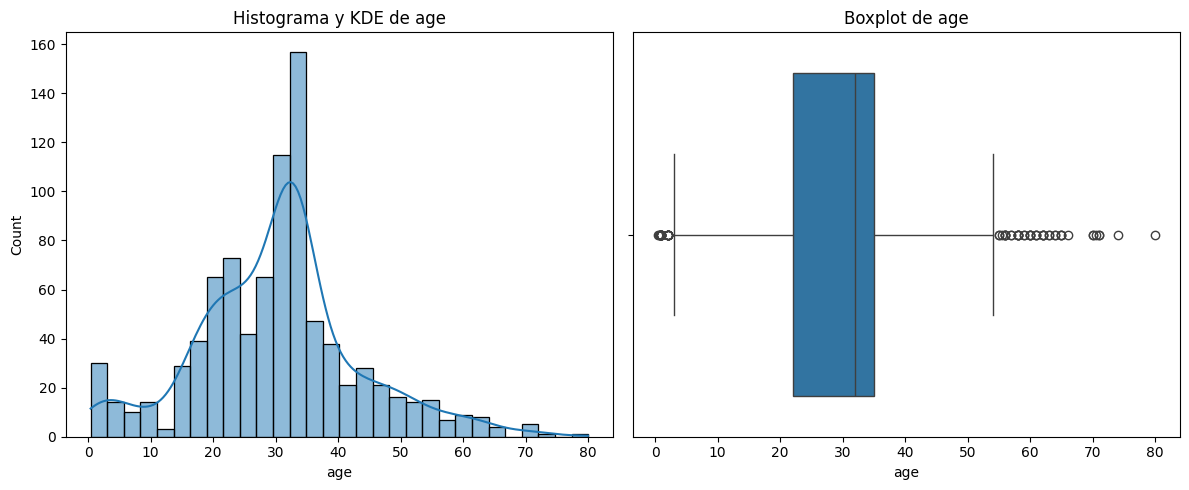

In [78]:
#primero calculamos quienes sobrevieron en terminos absolutos
survival_counts = df_titanic['alive'].value_counts()
print(survival_counts) #quienes sobrevivieron y quienes no
#despues calculamos quienes sobrevieron en cada grupo en terminos relativos
survival_proportions = df_titanic.groupby('sex')['alive'].value_counts(normalize=True)
print(survival_proportions) #proporcion de pasajeros que sobrevivieron en cada grupo

#usamos un test chi-cuadrado porque queremos saber si hay una asociacion significativa entre las dos variables categoricas sex y alive
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_titanic['sex'], df_titanic['alive'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-squared statistic:', chi2) #valor chi-cuadrado
print('P-value:', p) #valor p

#usamos un test chi-cuadrado para saber si hay relacion entre edad y alive
df_titanic['age_group'] = pd.cut(df_titanic['age'], bins=[0, 18, float('inf')], labels=['child', 'adult'])
contingency_table = pd.crosstab(df_titanic['age_group'], df_titanic['alive'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Valor chi_cuadrado:', chi2) #valor chi-cuadrado
print('P-value:', p) #valor p

pinta_distribucion_categoricas(df_titanic, ["age", "alive"], relativa = True, mostrar_valores=True)
pinta_distribucion_categoricas(df_titanic, ["sex", "alive"], relativa = True, mostrar_valores=True)
plot_categorical_relationship_fin(df_titanic, "age", "alive", show_values=True)
plot_combined_graphs(df_titanic, ["age"])


Analizando los resultados, en términos absolutos vemos que hubo menos pasajeros que sobrevivieron, y en términos relativos, vemos que el 75% de las mujeres y el 20% de los hombres sobrevivieron.
Además, no existe una relación estadísticamente significativa entre el sexo y la supervivencia ya que el valor p es mayor de 0,05. Sin embargo, sí existe relación entre la edad y la supervivencia ya que el valor p es menos de 0.05.

***2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?***


class   alive
First   yes      0.629630
        no       0.370370
Second  no       0.527174
        yes      0.472826
Third   no       0.757637
        yes      0.242363
Name: proportion, dtype: float64
Valor chi_cuadrado: 102.88898875696056
P-value: 4.549251711298793e-23


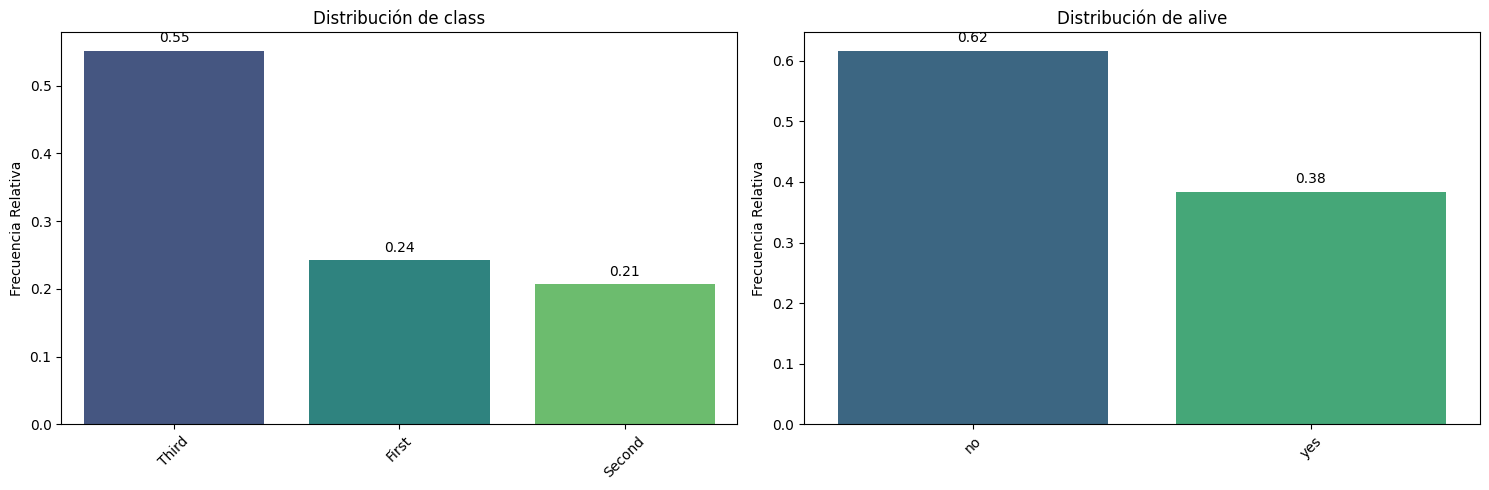

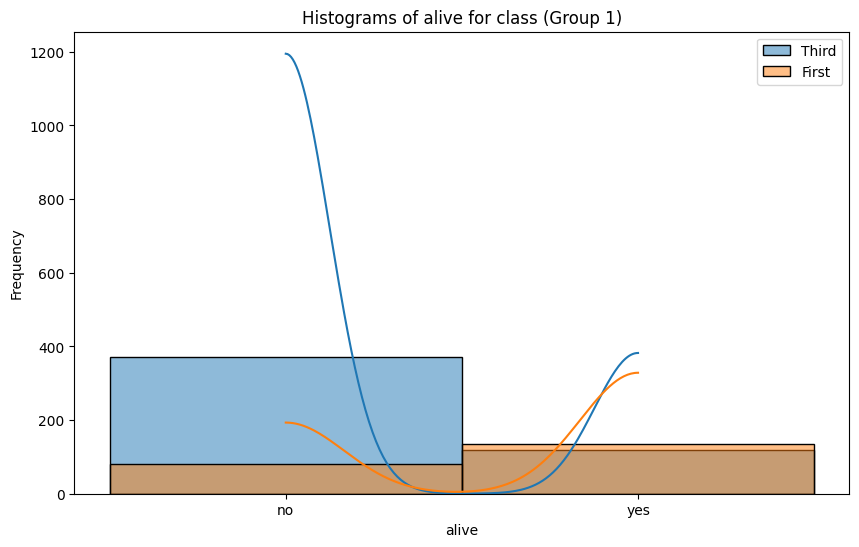

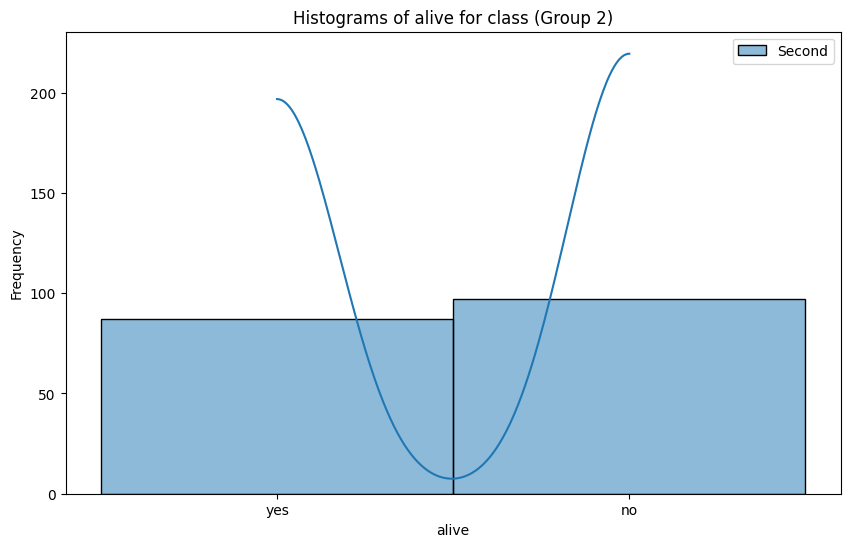

In [72]:
#calculamos la proporcion de pasajeros que sobrevivieron de cada clase
survival_proportions = df_titanic.groupby('class')['alive'].value_counts(normalize=True)
print(survival_proportions) #proporcion de pasajeros que sobrevivieron de cada clase

#usamos un test chi-cuadrado para saber si hay relacion entre clase y alive
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_titanic['class'], df_titanic['alive'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Valor chi_cuadrado:', chi2)
print('P-value:', p)

pinta_distribucion_categoricas(df_titanic, ["class", "alive"], relativa = True, mostrar_valores=True)
plot_grouped_histograms(df_titanic, "class", "alive", 2)


Analizando los resultados, vemos que en la primera clase sobrevivió el 63%, en la segunda clase sobrevivió el 47% y en la tercera clase sobrevivió el 24%.
Según el valor p del test chi-cuadrado, al ser mayor de 0.05 sabemos que no guardan relación las variables clase y alive entre si.

***3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?***


embark_town  alive
Cherbourg    yes      0.553571
             no       0.446429
Queenstown   no       0.610390
             yes      0.389610
Southampton  no       0.660991
             yes      0.339009
Name: proportion, dtype: float64
Valor chi-cuadrado: 25.964452881874784
P-value: 2.3008626481449577e-06


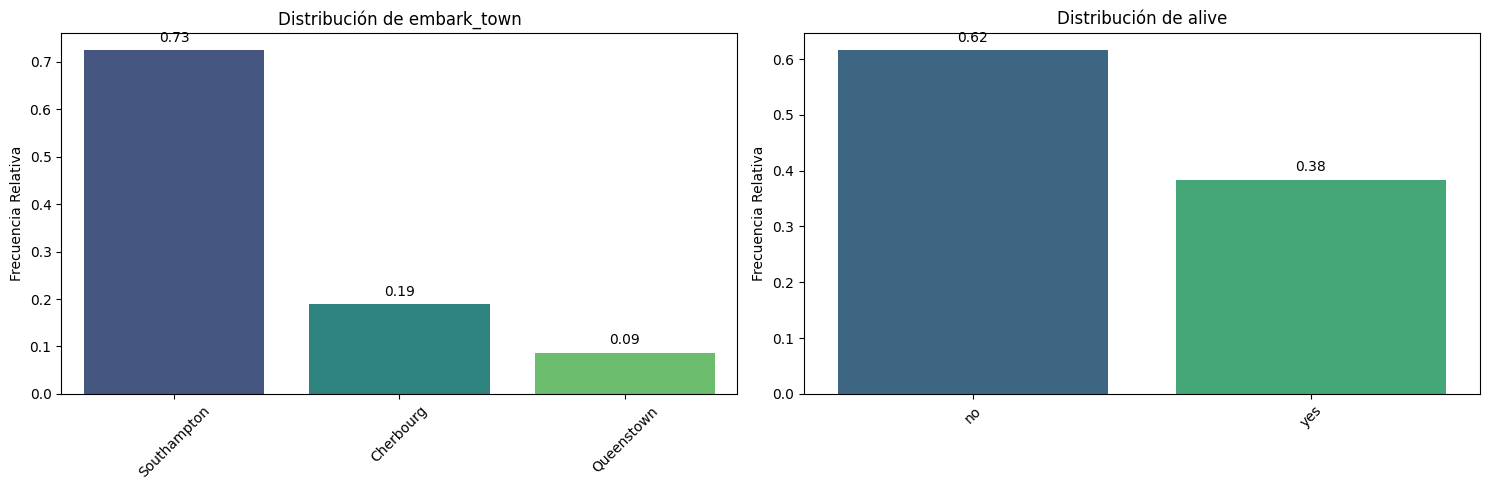

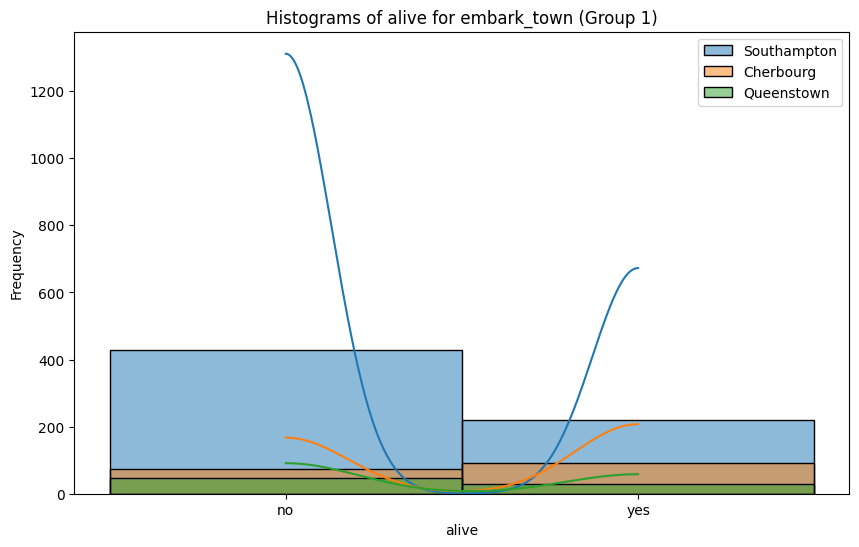

In [71]:
#calculamos la proporcion de pasajeros que sobrevivieron segun la ciudad desde la que embarcaron
survival_proportions = df_titanic.groupby('embark_town')['alive'].value_counts(normalize=True)
print(survival_proportions) #proporcion de pasajeros supervivientes en funcion de la ciudad de embarque

#usamos el test chi-cuadrado para averiguar si hay relacion entre las variables embark_town y alive
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Valor chi-cuadrado:', chi2)
print('P-value:', p)

pinta_distribucion_categoricas(df_titanic, ["embark_town", "alive"], relativa = True, mostrar_valores=True)
plot_grouped_histograms(df_titanic, "embark_town", "alive", 3)

Analizando los resultados, vemos que de los pasajeros que embarcaron en Cherboug sobrevivieron el 55%, de los pasajeros que embarcaron en Queenstown sobrevivieron el 39% y de los pasajeros que embarcaron en Southampton sobrevivieron el 34%.
Analizando el valor p del test chi-cuadrado, observamos que no existe relacion entre la ciudad de embarque y la supervivencia ya que su valor es mayor de 0.05 (de hecho, es demasiado alto y esto es debido a que la mayor parte de los pasajeros embarcaron en Southampton).

***4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?***


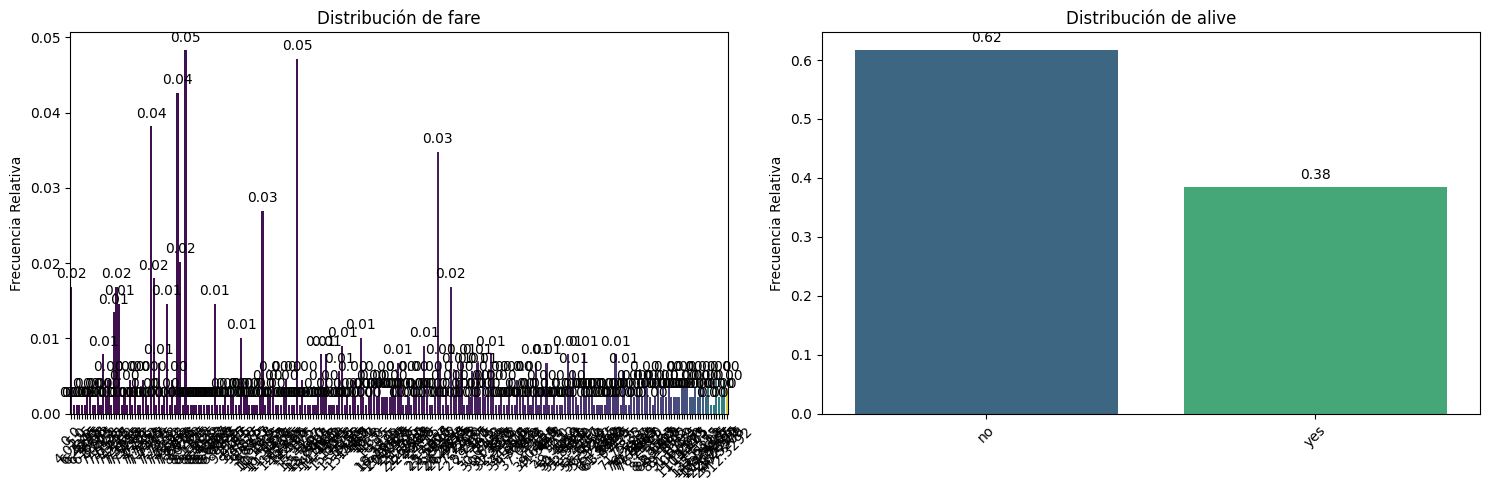

In [77]:
#calculamos con una matriz de correlacion
corr_matrix = df_titanic.corr(numeric_only=True)
corr_matrix
pinta_distribucion_categoricas(df_titanic, ["fare", "alive"], relativa = True, mostrar_valores=True)


Analizando los resultados, observamos que el precio del pasaje guarda relación con la edad de los pasajeros y si eran miembros de la tripulación o familiares ya que la correlación es positiva.

***5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?***


In [43]:
#averiguamos cual es el precio maximo del billete que pago algun pasajero (con dos decimales)
max_fare = round(df_titanic['fare'].max(), 2)
print("El precio máximo del billete fue", max_fare)

#calculamos la posicion del valor maximo del billete
max_fare_index = df_titanic['fare'].idxmax()
print('Posición del valor máximo de la tarifa:', max_fare_index)

#despues de averiguar que es la posicion 258, averiguamos el valor de alive en esa posicion
alive_value = df_titanic.loc[258, 'alive']
print('¿El pasajero sobrevivió?:', alive_value)



El precio máximo del billete fue 512.33
Posición del valor máximo de la tarifa: 258
¿El pasajero sobrevivió?: yes


Los pasajeros que no pagaron billete son los que eran miembros de la tripulación o los que eran familiares o amigos de ésta. El pasajero que pagó más por su billete sobrevivió.

***6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.***


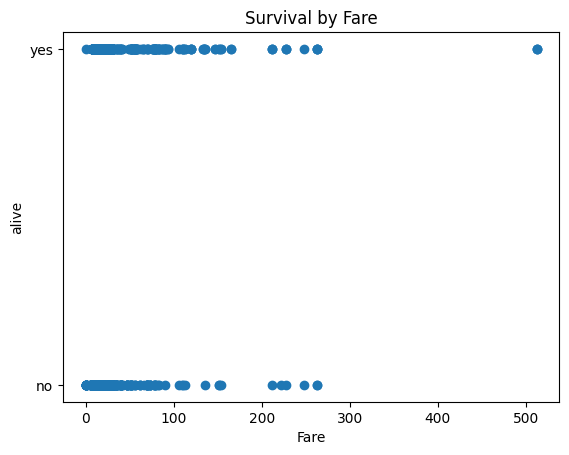

In [45]:
#averiguamos visualmente si existe relacion entre el precio del billete y la supervivencia
plt.scatter(df_titanic['fare'], df_titanic['alive'])
plt.title('Survival by Fare')
plt.xlabel('Fare')
plt.ylabel('alive')
plt.show()


Según la gráfica, no existe relación aparente entre el precio del billete y la superviviencia.

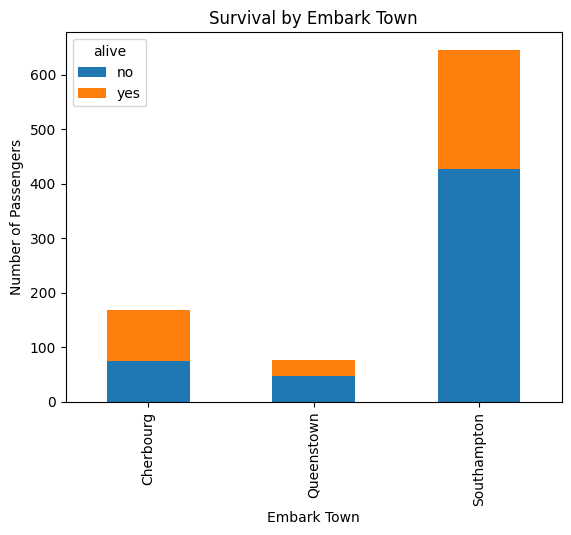

In [46]:
#averiguamos visualmente si existe relacion entre la ciudad de embarque y la supervivencia
survival_counts = df_titanic.groupby(['embark_town', 'alive'])['alive'].count().unstack()
survival_counts.plot(kind='bar', stacked=True)
plt.title('Survival by Embark Town')
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')
plt.show()


Según la gráfica, no existe relación aparente entre la ciudad de embarque y la supervivencia.

***7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?***


C:\Users\estel\AppData\Local\Temp\ipykernel_5172\2245686638.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = df_titanic.groupby(['class', pd.cut(df_titanic['age'], bins=[0, 18, float('inf')], labels=['child', 'adult'])])['alive'].value_counts(normalize=True).unstack()


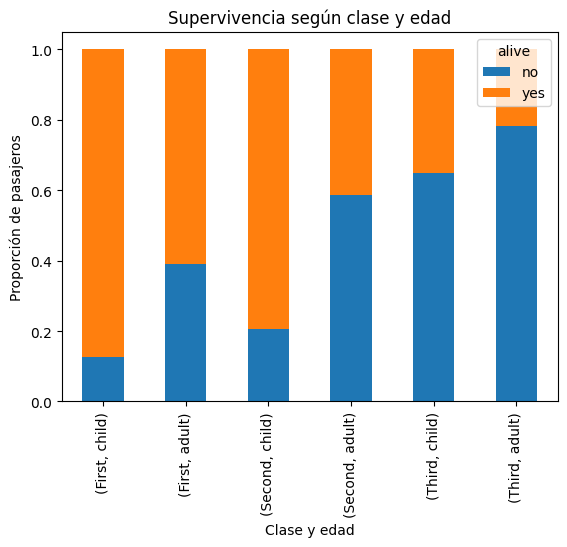

In [52]:
#averiguamos si existe relacion entre la supervivencia, la clase y la edad
survival_counts = df_titanic.groupby(['class', pd.cut(df_titanic['age'], bins=[0, 18, float('inf')], labels=['child', 'adult'])])['alive'].value_counts(normalize=True).unstack()
survival_counts.plot(kind='bar', stacked=True)
plt.title('Supervivencia según clase y edad')
plt.xlabel('Clase y edad')
plt.ylabel('Proporción de pasajeros')
plt.show()

Obervando las gráficas, sobrevieron más niños de la primera clase en términos absolutos y sobrevieron más niños de la segunda clase en términos relativos.

***8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?***

C:\Users\estel\AppData\Local\Temp\ipykernel_5172\378209221.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = df_titanic.groupby([pd.cut(df_titanic['age'], bins=[0, 18, float('inf')], labels=['child', 'adult']), pd.cut(df_titanic['fare'], bins=[0, 50, 100, 150, 200, float('inf')], labels=['0-50', '50-100', '100-150', '150-200', '200+'])])['alive'].value_counts(normalize=True).unstack()


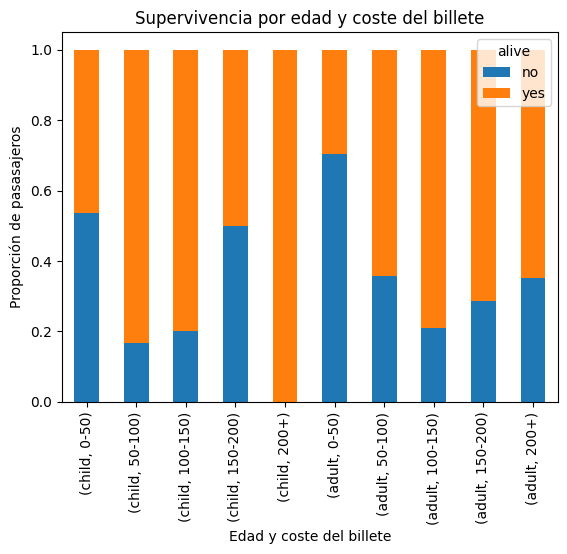

In [54]:
#averiguamos la relacion entre la superviencia, la edad y el coste del billete
survival_counts = df_titanic.groupby([pd.cut(df_titanic['age'], bins=[0, 18, float('inf')], labels=['child', 'adult']), pd.cut(df_titanic['fare'], bins=[0, 50, 100, 150, 200, float('inf')], labels=['0-50', '50-100', '100-150', '150-200', '200+'])])['alive'].value_counts(normalize=True).unstack()
survival_counts.plot(kind='bar', stacked=True)
plt.title('Supervivencia por edad y coste del billete')
plt.xlabel('Edad y coste del billete')
plt.ylabel('Proporción de pasasajeros')
plt.show()


Observando la gráfica, vemos que no hay relación entre la superviviencia y la edad y el coste del billete, sin embargo, observamos que los niños que pagaron la tarifa más alta sobrevivieron.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [80]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

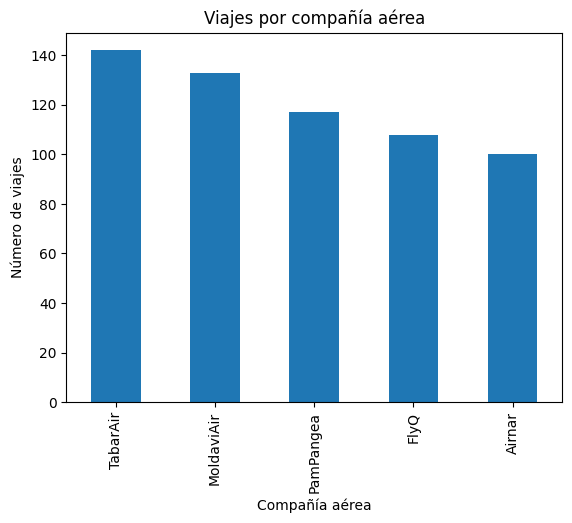

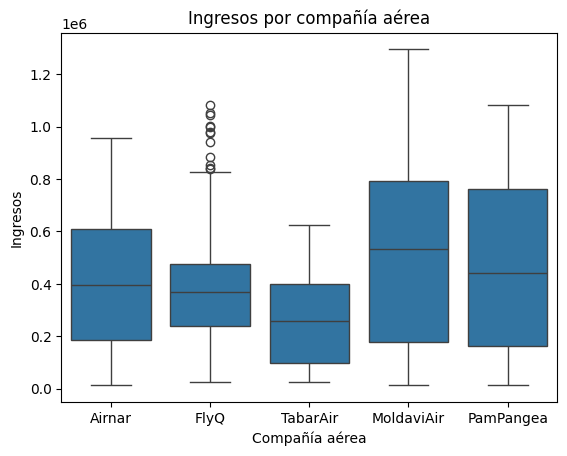

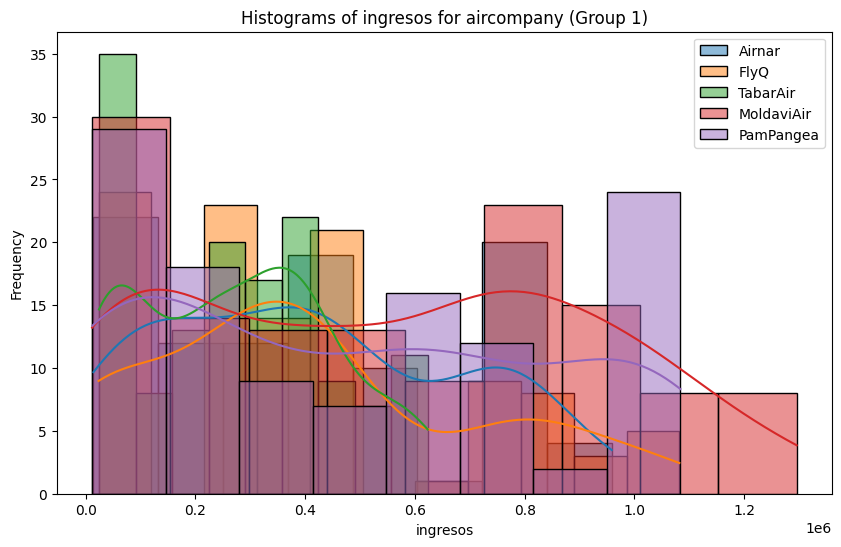

In [90]:
#mostramos los viajes por compañia aerea
df_air_jun["aircompany"].value_counts().plot(kind="bar")
plt.title("Viajes por compañía aérea")
plt.xlabel("Compañía aérea")
plt.ylabel("Número de viajes")
plt.show()

#analizamos las variables aircompany e ingresos
sns.boxplot(x="aircompany", y="ingresos", data=df_air_jun)
plt.title("Ingresos por compañía aérea")
plt.xlabel("Compañía aérea")
plt.ylabel("Ingresos")
plt.show()

plot_grouped_histograms(df_air_jun, "aircompany", "ingresos", 5)


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

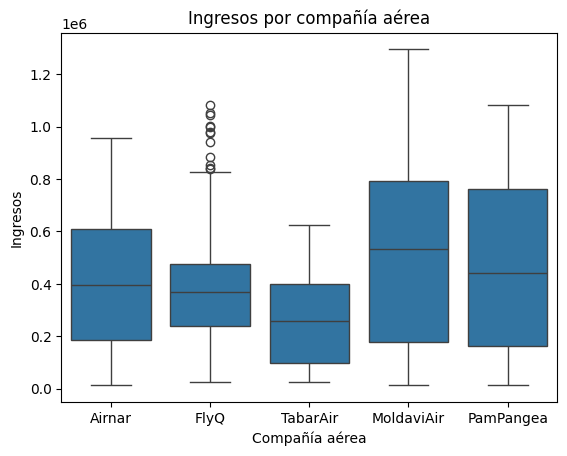

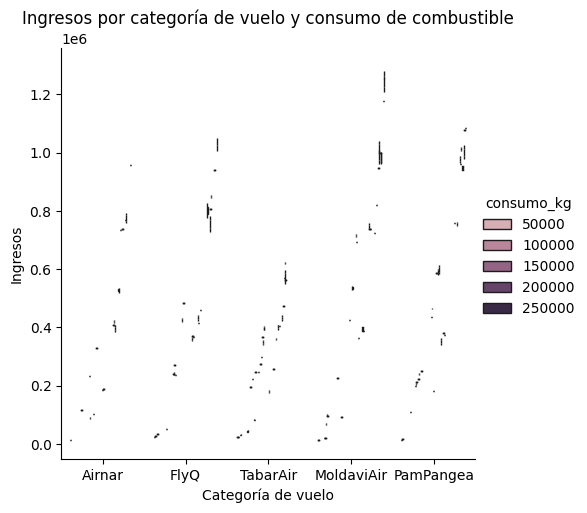

In [104]:
#analizamos la relacion entre ingresos, distancias y consumo_kg
sns.boxplot(x="aircompany", y="ingresos", data=df_air_jun)
plt.title("Ingresos por compañía aérea")
plt.xlabel("Compañía aérea")
plt.ylabel("Ingresos")
plt.show()

sns.catplot(x="aircompany", y="ingresos", hue="consumo_kg", kind="box", data=df_air_jun)
plt.title("Ingresos por categoría de vuelo y consumo de combustible")
plt.xlabel("Categoría de vuelo")
plt.ylabel("Ingresos")
plt.show()



Con el diagrama de caja, observamos que la única compañía que tiene valores raros (ouliers), es decir, valores fuera de rango, es FlyQ.
Además, observamos que la compañía con más ingresos es MoldaviAir.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

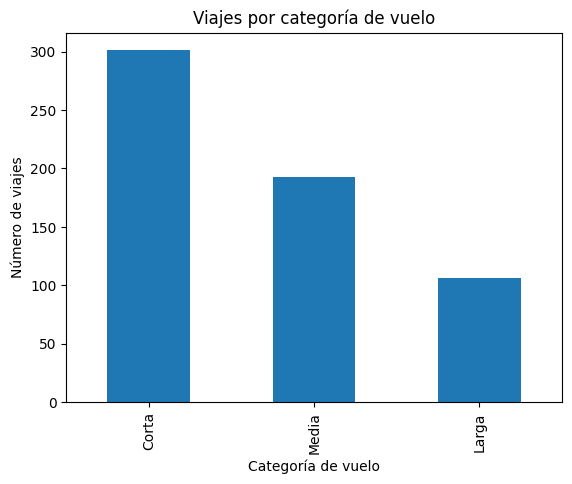

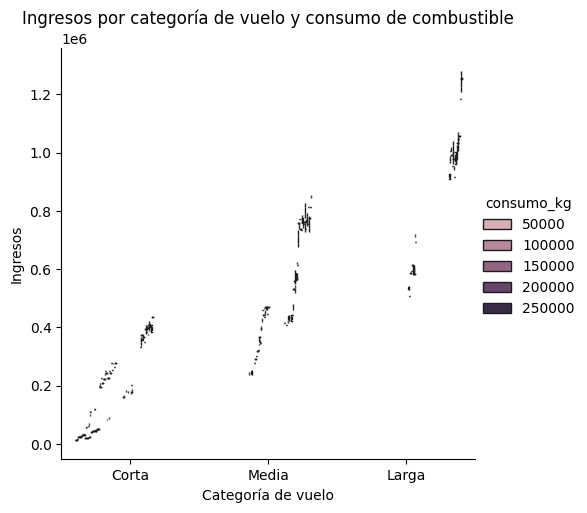

In [102]:
# dividimos los valores de distancias en 3 categorías
df_air_jun["cat_vuelo"] = pd.cut(df_air_jun["distancia"], bins=3, labels=["Corta", "Media", "Larga"])

#mostramos los viajes por categoría de vuelo
df_air_jun["cat_vuelo"].value_counts().plot(kind="bar")
plt.title("Viajes por categoría de vuelo")
plt.xlabel("Categoría de vuelo")
plt.ylabel("Número de viajes")
plt.show()

sns.catplot(x="cat_vuelo", y="ingresos", hue="consumo_kg", kind="box", data=df_air_jun)
plt.title("Ingresos por categoría de vuelo y consumo de combustible")
plt.xlabel("Categoría de vuelo")
plt.ylabel("Ingresos")
plt.show()


Observando la gráfica, vemos que a medida que aumenta la distancia del vuelo los ingresos y el consumo_kg son mayores.